<a href="https://colab.research.google.com/github/Nawrin14/DataThrone/blob/main/Social_Media_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

At first, the required libraries are loaded.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The excel dataset is loaded using Pandas read_excel() method.

In [ ]:
df = pd.read_excel("/content/insight_002.xlsx")

We
use
the
 head() method
to display the first 5 rows of the dataframe.

In [ ]:
df.head()

,Post ID,Post Message,Type,Countries,Languages,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
0,NaN,NaN,NaN,NaN,NaN,NaT,NaN,Lifetime: The number of people who had your Pa...,Lifetime: The number of people who had your Pa...,Lifetime: The number of people who had your Pa...,Lifetime: The number of times your Page's post...,Lifetime: The number of times your Page's post...,Lifetime: The number of times your Page's post...,Lifetime: The number of unique people who enga...,Lifetime: The number of people who matched the...,Lifetime: The number of clicks anywhere in you...,Lifetime: The number of people who have given ...,Lifetime: The number of times people have give...,Lifetime: The number of impressions of your Pa...,Lifetime: The number of people who saw your Pa...,Lifetime: The number of paid impressions of yo...,Lifetime: The number of people who like your P...,Lifetime: The number of people who have liked ...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Number of times your video was viewe...,Lifetime: Average time video viewed (Total Count),Lifetime: Length of a video post (Total Count)
1,1277547548992987_1741796732568064,Congratulations to the winners of the first on...,Photo,NaN,NaN,2018-06-22 07:58:04,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1277547548992987_1731769263570811,May your Eid celebrations be as charming as th...,Video,NaN,NaN,2018-06-15 13:43:23,,1556,1556,0,3125,3125,0,148,98,158,0,0,2119,1001,0,0,108,72,93,0,0,389,500,0,0,5035,24355
3,1277547548992987_1731343926946678,Wishing everyone a very happy Eid al-Fitr. As ...,Photo,NaN,NaN,2018-06-15 06:57:45,,2,2,0,2,2,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1277547548992987_1727479250666479,What's trending this eid? 🤔,Photo,NaN,NaN,2018-06-12 11:33:50,,1,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


We use the shape() method to find  the number of rows and columns of the dataframe.

In [ ]:
df.shape

(292, 33)

The first row of the dataframe does not contain any data. Rather the details of each column is stored in the first row. So, we drop the first row of the dataframe using the drop() method. Then we use the reset_index() method to reset the index.

In [ ]:
df.drop(0, inplace = True)
df.reset_index(drop = True, inplace = True)

We use the info() method to print a summary of the dataframe including the index and column data types and the count of non-null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 33 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Post ID                                                              291 non-null    object        
 1   Post Message                                                         273 non-null    object        
 2   Type                                                                 289 non-null    object        
 3   Countries                                                            0 non-null      float64       
 4   Languages                                                            0 non-null      float64       
 5   Posted                                                               291 non-null    datetime64[ns]
 6   Audience Targeting                                

All the values of the 'Countries' and 'Languages' columns are null values. So, we drop the 'Countries' and 'Languages' columns.

In [ ]:
df.drop(["Countries", "Languages"], axis = 1, inplace = True)

We use the describe() method to obtain a statistical summary of the dataframe.

In [ ]:
df.describe(include = "all", datetime_is_numeric=True)

,Post ID,Post Message,Type,Posted,Audience Targeting,Lifetime Post Total Reach,Lifetime Post organic reach,Lifetime Post Paid Reach,Lifetime Post Total Impressions,Lifetime Post Organic Impressions,Lifetime Post Paid Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime Post Paid Impressions by people who have liked your Page,Lifetime Paid reach of a post by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Paid views to 95%,Lifetime Paid views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Paid Video Views,Lifetime Paid Video Views.1,Lifetime Average time video viewed,Lifetime Video length
count,291,273,289,291,291,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0,291.0
unique,291,270,5,NaN,1,230.0,230.0,1.0,234.0,234.0,1.0,162.0,150.0,164.0,5.0,6.0,228.0,221.0,1.0,1.0,149.0,31.0,31.0,1.0,1.0,54.0,51.0,1.0,1.0,29.0,50.0
top,1277547548992987_1564914663589606,Poster Maestros,Photo,NaN,,2.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1,3,186,NaN,291,26.0,26.0,291.0,25.0,25.0,291.0,64.0,66.0,66.0,255.0,255.0,25.0,26.0,291.0,291.0,66.0,260.0,260.0,291.0,291.0,234.0,239.0,291.0,291.0,263.0,240.0
mean,NaN,NaN,NaN,2019-11-27 06:33:45.034363904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2017-12-31 09:58:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2019-02-21 06:07:16.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2020-03-17 01:47:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2020-07-24 02:16:18.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2021-03-04 20:00:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The 'Audience' column has only one unique value. So, we drop this column as there is no variance in this column values. 

In [ ]:
df.drop("Audience Targeting", axis = 1, inplace = True)

We drop the unnecessary columns that do not contain any valuable information and will not help us to find insights from the data.

In [ ]:
df.drop(["Post ID", "Post Message", "Lifetime Post organic reach", "Lifetime Post Paid Reach", "Lifetime Post Organic Impressions", "Lifetime Post Paid Impressions", "Lifetime Post Paid Impressions by people who have liked your Page", "Lifetime Paid reach of a post by people who like your Page", "Lifetime Paid views to 95%", "Lifetime Paid views to 95%.1", "Lifetime Paid Video Views", "Lifetime Paid Video Views.1" ], axis =1, inplace = True)

We convert the data types of the columns using the infer_objects() method as some of the columns do not have the correct data type.

In [ ]:
df = df.infer_objects()
df.dtypes

Type                                                                           object
Posted                                                                 datetime64[ns]
Lifetime Post Total Reach                                                       int64
Lifetime Post Total Impressions                                                 int64
Lifetime Engaged Users                                                          int64
Lifetime Matched Audience Targeting Consumers on Post                           int64
Lifetime Matched Audience Targeting Consumptions on Post                        int64
Lifetime Negative Feedback from Users                                           int64
Lifetime Negative Feedback                                                      int64
Lifetime Post Impressions by people who have liked your Page                    int64
Lifetime Post reach by people who like your Page                                int64
Lifetime People who have liked your Page and engaged w

Now all the columns have the correct data type.

We handle the missing values of the 'Type' column by replacing them with the most frequent value of the column using the method replace().

In [ ]:
df["Type"].replace(np.nan, df["Type"].value_counts().idxmax(), inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 18 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Type                                                                 291 non-null    object        
 1   Posted                                                               291 non-null    datetime64[ns]
 2   Lifetime Post Total Reach                                            291 non-null    int64         
 3   Lifetime Post Total Impressions                                      291 non-null    int64         
 4   Lifetime Engaged Users                                               291 non-null    int64         
 5   Lifetime Matched Audience Targeting Consumers on Post                291 non-null    int64         
 6   Lifetime Matched Audience Targeting Consumptions o

Now the data is processed. It has no missing values and the data types are also correct.

We find the correlation of all the the numeric columns of the dataframe using the corr() method.

In [ ]:
df.corr()

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Average time video viewed,Lifetime Video length
Lifetime Post Total Reach,1.000000,0.981601,0.882641,0.821390,0.762453,0.282300,0.259817,0.909835,0.888822,0.882466,0.374821,0.376613,0.498431,0.503436,0.313611,0.092060
Lifetime Post Total Impressions,0.981601,1.000000,0.872118,0.813738,0.760049,0.265681,0.243494,0.937582,0.862648,0.871672,0.429660,0.428942,0.527860,0.531186,0.310595,0.083097
Lifetime Engaged Users,0.882641,0.872118,1.000000,0.979857,0.954847,0.464318,0.433242,0.807865,0.785014,0.966099,0.358376,0.355986,0.630175,0.635128,0.547500,0.206339
Lifetime Matched Audience Targeting Consumers on Post,0.821390,0.813738,0.979857,1.000000,0.984577,0.482226,0.451560,0.751028,0.719886,0.940019,0.363528,0.361488,0.674961,0.681405,0.595942,0.235332
Lifetime Matched Audience Targeting Consumptions on Post,0.762453,0.760049,0.954847,0.984577,1.000000,0.551361,0.514338,0.702370,0.665612,0.903104,0.328418,0.327175,0.700015,0.710260,0.686827,0.286527
Lifetime Negative Feedback from Users,0.282300,0.265681,0.464318,0.482226,0.551361,1.000000,0.962623,0.256122,0.277802,0.395640,-0.028436,-0.027314,0.436446,0.451966,0.696829,0.408839
Lifetime Negative Feedback,0.259817,0.243494,0.433242,0.451560,0.514338,0.962623,1.000000,0.243012,0.268611,0.377402,-0.030494,-0.029382,0.400760,0.415343,0.643701,0.377198
Lifetime Post Impressions by people who have liked your Page,0.909835,0.937582,0.807865,0.751028,0.702370,0.256122,0.243012,1.000000,0.948412,0.873316,0.428636,0.423947,0.505752,0.504137,0.283678,0.069463
Lifetime Post reach by people who like your Page,0.888822,0.862648,0.785014,0.719886,0.665612,0.277802,0.268611,0.948412,1.000000,0.870808,0.306710,0.303284,0.415170,0.412090,0.272049,0.080241
Lifetime People who have liked your Page and engaged with your post,0.882466,0.871672,0.966099,0.940019,0.903104,0.395640,0.377402,0.873316,0.870808,1.000000,0.363507,0.360626,0.566029,0.568662,0.454554,0.152266


We use the method value_counts() to count the number of posts with unique 'Type' values. Then we use the method to_frame() to convert it to a dataframe.

In [ ]:
df["Type"].value_counts().to_frame()

,Type
Photo,188
Status,29
Video,28
Link,26
SharedVideo,20


Most of the posts are of the type 'Photo'. The type 'SharedVideo' has the least number of posts.

We use the function boxplot in the seaborn library to determine which type of posts have more post reach outliers.

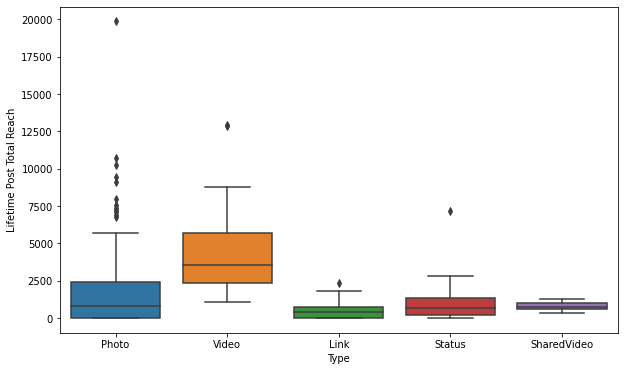

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Type', y = 'Lifetime Post Total Reach', data = df)
plt.show()

The posts of the type 'Photo' has a lot of 'Lifetime Post Total Reach' outliers.

We use the function stripplot in the seaborn library to determine which type of posts have more post impressions outliers.

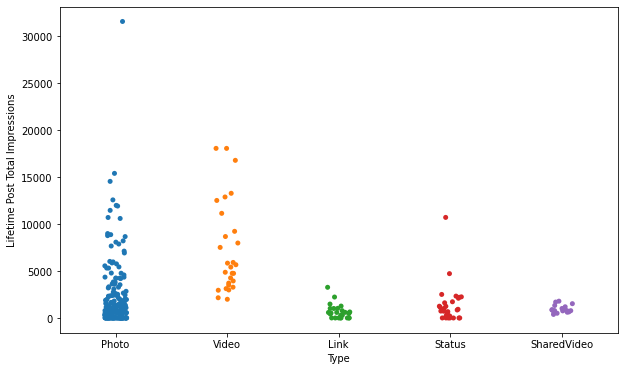

In [ ]:
plt.figure(figsize = (10,6))
sns.stripplot(x = 'Type', y = 'Lifetime Post Total Impressions', data = df)
plt.show()

The posts of the type 'Photo', 'Video' and 'Status' have 'Lifetime Post Total Impressions' outliers.

We use bargraphs to understand the distribution of Lifetime Engaged Users and Lifetime Negative Feedback for each Type.

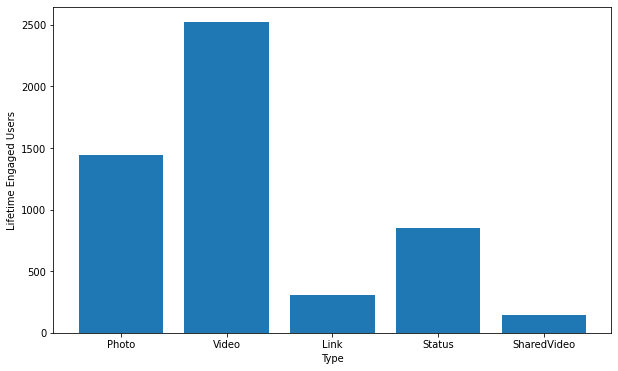

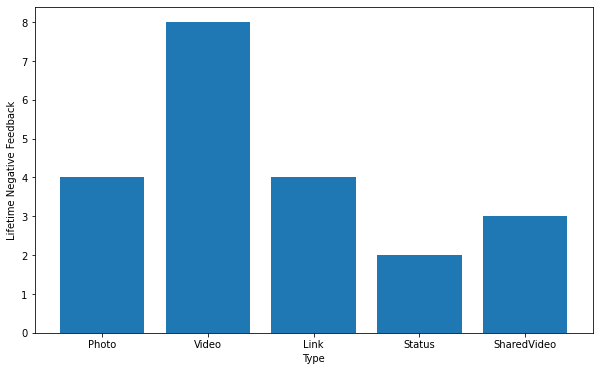

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(df['Type'], df['Lifetime Engaged Users'])
plt.xlabel("Type")
plt.ylabel("Lifetime Engaged Users")
plt.show()
plt.figure(figsize = (10,6))
plt.bar(df['Type'], df['Lifetime Negative Feedback'])
plt.xlabel("Type")
plt.ylabel("Lifetime Negative Feedback")
plt.show()

The posts of the type 'Video' has the highest 'Lifetime Engaged Users' followed by the type 'Photo', 'Status', 'Link', 'SharedVideo'.
The posts of the type 'Video' has the highest 'Lifetime Negative Feedback'. 'Photo' and 'Link' have the similar amount of 'Lifetime Negative Feedback'

We use the groupby() method to split the data into groups based on 'Type' and we apply the mean() function to find the average of 'Lifetime People who have liked your Page and engaged with your post' for each group.

In [ ]:
grps = df[['Type', 'Lifetime People who have liked your Page and engaged with your post']]
grps_df = grps.groupby(['Type'], as_index=False).mean()
grps_df

,Type,Lifetime People who have liked your Page and engaged with your post
0,Link,35.923077
1,Photo,100.308511
2,SharedVideo,51.750000
3,Status,71.482759
4,Video,296.285714


We use the groupby() method to split the data into groups based on 'Type' and we apply the mean() function to find the average of 'Lifetime Post Impressions by people who have liked your Page' for each group.

In [ ]:
grps = df[['Type', 'Lifetime Post Impressions by people who have liked your Page']]
grps_df = grps.groupby(['Type'], as_index=False).mean()
grps_df

,Type,Lifetime Post Impressions by people who have liked your Page
0,Link,563.538462
1,Photo,1313.888298
2,SharedVideo,835.100000
3,Status,998.620690
4,Video,3708.178571


The number of 'Lifetime People who have liked your Page and engaged with your post' and 'Lifetime Post Impressions by people who have liked your Page' both is highest for the type 'Video' and lowest for 'Link'.

We use the function regplot in the seaborn library to determine if the feature 'Lifetime Matched Audience Targeting Consumptions on Post' is negatively or positively correlated with 'Lifetime Organic Video Views'.

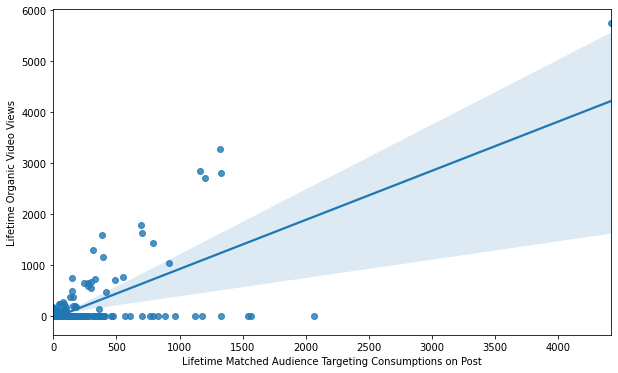

In [ ]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'Lifetime Matched Audience Targeting Consumptions on Post', y = 'Lifetime Organic Video Views', data = df)
plt.show()

There is some positive correlation between 'Lifetime Matched Audience Targeting Consumptions on Post' and 'Lifetime Organic Video Views'.

We use the function regplot in the seaborn library to determine if the feature 'Lifetime Matched Audience Targeting Consumers on Post' is negatively or positively correlated with 'Lifetime Post Total Impressions'.

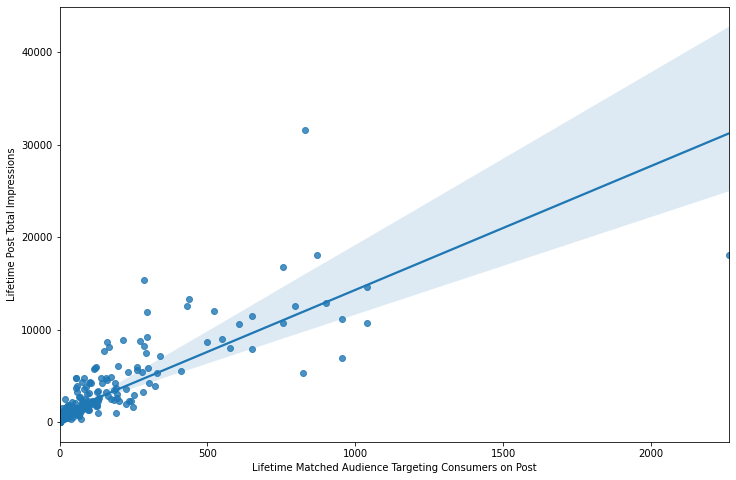

In [ ]:
plt.figure(figsize = (12,8))
sns.regplot(x = 'Lifetime Matched Audience Targeting Consumers on Post', y = 'Lifetime Post Total Impressions', data = df)
plt.show()

There is some positive correlation between 'Lifetime Matched Audience Targeting Consumers on Post' and 'Lifetime Post Total Impressions'.

We split the column 'Posted' of the datetime type into day, month, year, hour and weekday and drop the column 'Posted'

In [ ]:
df["Day"] = df["Posted"].dt.day
df["Month"] = df["Posted"].dt.month
df["Year"] = df["Posted"].dt.year
df["Hour"] = df["Posted"].dt.hour
df["Weekday"] = df["Posted"].dt.weekday
df.drop("Posted", axis = 1, inplace = True)

In [ ]:
df.head()

,Type,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Matched Audience Targeting Consumers on Post,Lifetime Matched Audience Targeting Consumptions on Post,Lifetime Negative Feedback from Users,Lifetime Negative Feedback,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Lifetime Organic views to 95%,Lifetime Organic views to 95%.1,Lifetime Organic Video Views,Lifetime Organic Video Views.1,Lifetime Average time video viewed,Lifetime Video length,Day,Month,Year,Hour,Weekday
0,Photo,2,2,0,0,0,0,0,2,2,0,0,0,0,0,0,0,22,6,2018,7,4
1,Video,1556,3125,148,98,158,0,0,2119,1001,108,72,93,389,500,5035,24355,15,6,2018,13,4
2,Photo,2,2,0,0,0,0,0,2,2,0,0,0,0,0,0,0,15,6,2018,6,4
3,Photo,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,12,6,2018,11,1
4,Photo,2,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,10,6,2018,8,6


We use bargraphs to understand the distribution of 'Lifetime Post Total Reach' and 'Lifetime Average time video viewed' over each day of the week.

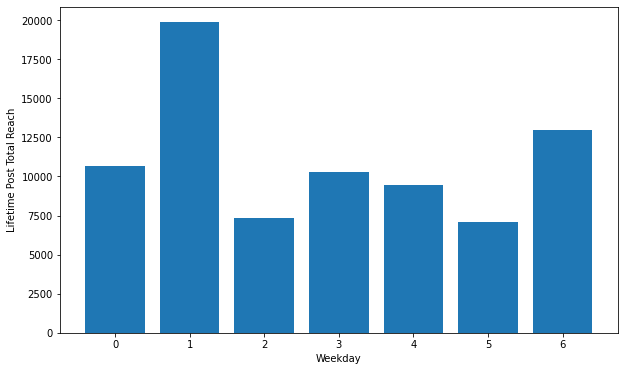

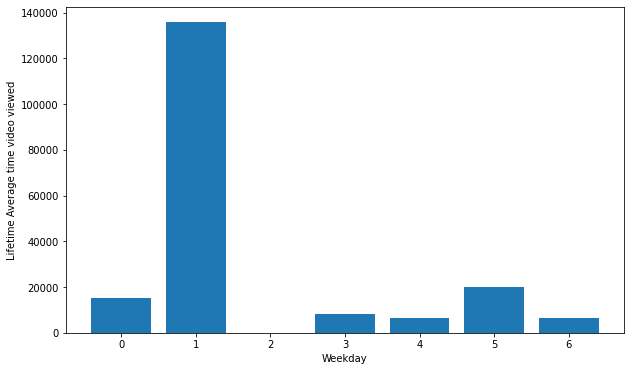

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(df['Weekday'], df['Lifetime Post Total Reach'])
plt.xlabel("Weekday")
plt.ylabel("Lifetime Post Total Reach")
plt.show()
plt.figure(figsize = (10,6))
plt.bar(df['Weekday'], df['Lifetime Average time video viewed'])
plt.xlabel("Weekday")
plt.ylabel("Lifetime Average time video viewed")
plt.show()

The number of 'Lifetime Post Total Reach' and 'Lifetime Average time video viewed' is highest on Tuesday. 'Lifetime Average time video viewed' is 0 on Wednesday.

We use bargraphs to understand the distribution of 'Lifetime Post Total Impressions' over each day of the month.

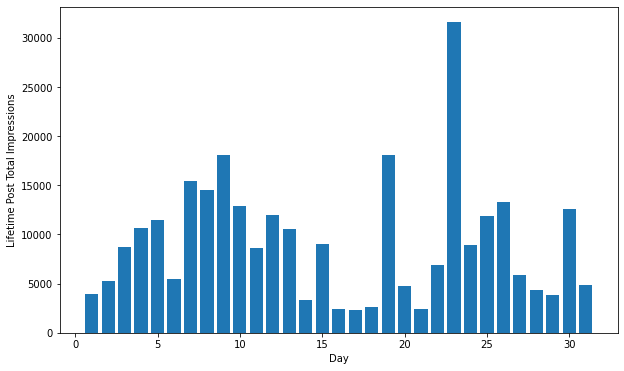

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(df['Day'], df['Lifetime Post Total Impressions'])
plt.xlabel("Day")
plt.ylabel("Lifetime Post Total Impressions")
plt.show()

The number of 'Lifetime Post Total Impressions' are consistent over a month.

We use bargraphs to understand the distribution of 'Lifetime Engaged Users' and 'Lifetime Negative Feedback from Users' over each hour in a day.

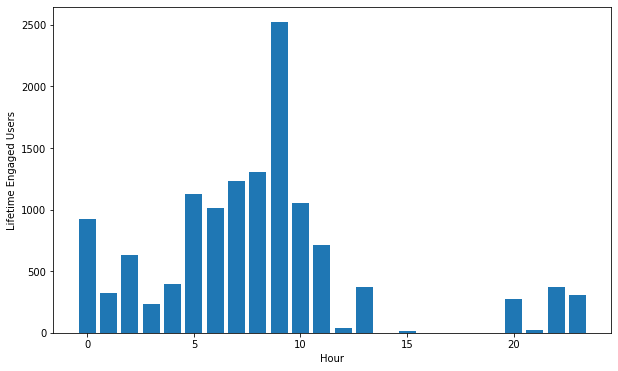

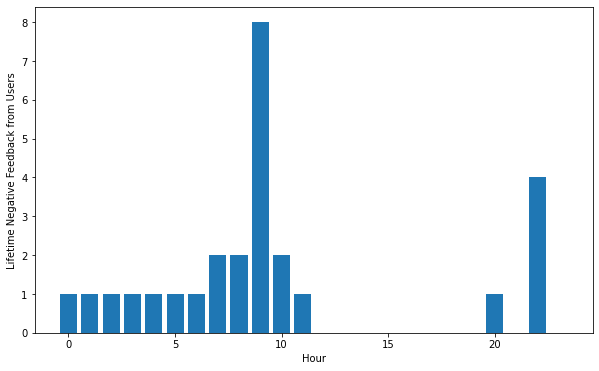

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(df['Hour'], df['Lifetime Engaged Users'])
plt.xlabel("Hour")
plt.ylabel("Lifetime Engaged Users")
plt.show()
plt.figure(figsize = (10,6))
plt.bar(df['Hour'], df['Lifetime Negative Feedback from Users'])
plt.xlabel("Hour")
plt.ylabel("Lifetime Negative Feedback from Users")
plt.show()

The number of 'Lifetime Engaged Users' and 'Lifetime Negative Feedback from Users' is lower during the last 12 hours of the day.

The csv file is loaded using Pandas read_csv() method.

In [ ]:
df1 = pd.read_csv("/content/insight_001.csv")
df1.head()

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,Daily Organic Reach,Weekly Organic Reach,28 Days Organic Reach,Daily Paid Reach,Weekly Paid Reach,28 Days Paid Reach,Daily Viral Reach,Weekly Viral Reach,28 Days Viral Reach,Daily Total Impressions,Weekly Total Impressions,28 Days Total Impressions,Daily Organic impressions,Weekly Organic impressions,28 Days Organic impressions,Daily Paid Impressions,Weekly Paid Impressions,28 Days Paid Impressions,Daily Viral impressions,Weekly Viral impressions,28 Days Viral impressions,Daily Logged-in Page Views,Weekly Logged-in Page Views,Daily Logged-in Page Views.1,Weekly Logged-in Page Views.1,Daily Reach Of Page Posts,Weekly Reach Of Page Posts,28 Days Reach Of Page Posts,Daily Organic Reach of Page posts,Weekly Organic Reach of Page posts,...,Daily Total web site click count per Page by age and gender - 45-54.U,Daily Total web site click count per Page by age and gender - 55-64.F,Daily Total web site click count per Page by age and gender - 55-64.M,Daily Total web site click count per Page by age and gender - 55-64.U,Daily Total web site click count per Page by age and gender - 65+.F,Daily Total web site click count per Page by age and gender - 65+.M,Daily Total web site click count per Page by age and gender - 65+.U,Daily Total web site click count per Page by age and gender - &lt;13.F,Daily Total web site click count per Page by age and gender - &lt;13.M,Daily Total web site click count per Page by age and gender - &lt;13.U,Daily Total web site click count per Page by age and gender - UNKNOWN.F,Daily Total web site click count per Page by age and gender - UNKNOWN.M,Daily Total web site click count per Page by age and gender - UNKNOWN.U,Weekly Total web site click count per Page by age and gender - 13-17.F,Weekly Total web site click count per Page by age and gender - 13-17.M,Weekly Total web site click count per Page by age and gender - 13-17.U,Weekly Total web site click count per Page by age and gender - 18-24.F,Weekly Total web site click count per Page by age and gender - 18-24.M,Weekly Total web site click count per Page by age and gender - 18-24.U,Weekly Total web site click count per Page by age and gender - 25-34.F,Weekly Total web site click count per Page by age and gender - 25-34.M,Weekly Total web site click count per Page by age and gender - 25-34.U,Weekly Total web site click count per Page by age and gender - 35-44.F,Weekly Total web site click count per Page by age and gender - 35-44.M,Weekly Total web site click count per Page by age and gender - 35-44.U,Weekly Total web site click count per Page by age and gender - 45-54.F,Weekly Total web site click count per Page by age and gender - 45-54.M,Weekly Total web site click count per Page by age and gender - 45-54.U,Weekly Total web site click count per Page by age and gender - 55-64.F,Weekly Total web site click count per Page by age and gender - 55-64.M,Weekly Total web site click count per Page by age and gender - 55-64.U,Weekly Total web site click count per Page by age and gender - 65+.F,Weekly Total web site click count per Page by age and gender - 65+.M,Weekly Total web site click count per Page by age and gender - 65+.U,Weekly Total web site click count per Page by age and gender - &lt;13.F,Weekly Total web site click count per Page by age and gender - &lt;13.M,Weekly Total web site click count per Page by age and gender - &lt;13.U,Weekly Total web site click count per Page by age and gender - UNKNOWN.F,Weekly Total web site click count per Page by age and gender - UNKNOWN.M,Weekly Total web site click count per Page by age and gender - UNKNOWN.U
0,NaN,Lifetime: The total number of people who have ...,Daily: The number of new people who have liked...,Daily: The number of Unlikes of your Page (Uni...,Daily: The number of people who engaged with y...,Weekly: The number of pe

We select a few columns from the dataframe df1 that contain valuable information and might help us to find insights from the data.

In [ ]:
df1 = df1[["Date", "Daily New Likes", "Daily Page Engaged Users", "Daily Total Reach", "Daily Viral Reach", "Daily Total Impressions of your posts", "Daily Total Consumers", "Daily Page Consumptions"]]

In [ ]:
df1.shape

(29, 8)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Date                                   28 non-null     object
 1   Daily New Likes                        27 non-null     object
 2   Daily Page Engaged Users               29 non-null     object
 3   Daily Total Reach                      29 non-null     object
 4   Daily Viral Reach                      29 non-null     object
 5   Daily Total Impressions of your posts  29 non-null     object
 6   Daily Total Consumers                  29 non-null     object
 7   Daily Page Consumptions                29 non-null     object
dtypes: object(8)
memory usage: 1.9+ KB


The first row of the dataframe df1 does not contain any data. Rather the details of each column is stored in the first row. So, we drop the first row of the dataframe using the drop() method. Then we use the reset_index() method to reset the index.

In [ ]:
df1.drop(0, inplace = True)
df1.reset_index(drop = True, inplace = True)
df1.head()

,Date,Daily New Likes,Daily Page Engaged Users,Daily Total Reach,Daily Viral Reach,Daily Total Impressions of your posts,Daily Total Consumers,Daily Page Consumptions
0,2/7/2021,3,29,921,813,1456,24,30
1,2/8/2021,3,22,556,489,1093,14,16
2,2/9/2021,1,91,2240,1679,3296,64,83
3,2/10/2021,3,19,616,547,1137,12,15
4,2/11/2021,NaN,11,443,407,743,8,10


We handle the missing values of the column 'Date' by droping the rows with the missing 'Date' values. We replace the missing values of the 'Daily New Likes' column with the most frequent value of the column using the method replace().  

In [ ]:
df1["Date"].dropna(axis = 0)
df1["Daily New Likes"].replace(np.nan, df1["Daily New Likes"].value_counts().idxmax(), inplace = True)

We convert the data types of the columns using the to_datetime and astype() methods as the columns do not have the correct data type.

In [ ]:
df1["Date"] = df1["Date"].apply(pd.to_datetime)
df1["Daily New Likes"] = df1["Daily New Likes"].astype('int')
df1["Daily Page Engaged Users"] = df1["Daily Page Engaged Users"].astype('int')
df1["Daily Total Reach"] = df1["Daily Total Reach"].astype('int')
df1["Daily Viral Reach"] = df1["Daily Viral Reach"].astype('int')
df1["Daily Total Impressions of your posts"] = df1["Daily Total Impressions of your posts"].astype('int')
df1["Daily Page Consumptions"] = df1["Daily Page Consumptions"].astype('int')
df1["Daily Total Consumers"] = df1["Daily Total Consumers"].astype('int')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   28 non-null     datetime64[ns]
 1   Daily New Likes                        28 non-null     int64         
 2   Daily Page Engaged Users               28 non-null     int64         
 3   Daily Total Reach                      28 non-null     int64         
 4   Daily Viral Reach                      28 non-null     int64         
 5   Daily Total Impressions of your posts  28 non-null     int64         
 6   Daily Total Consumers                  28 non-null     int64         
 7   Daily Page Consumptions                28 non-null     int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 1.9 KB


Now the data is processed. It has no missing values and the data types are also correct.

We set the 'Date' column as the index of the dataframe df1 using the set_index() method.

In [ ]:
df1.set_index("Date", inplace = True)
df1.head()

,Daily New Likes,Daily Page Engaged Users,Daily Total Reach,Daily Viral Reach,Daily Total Impressions of your posts,Daily Total Consumers,Daily Page Consumptions
Date,,,,,,,
2021-02-07,3,29,921,813,1456,24,30
2021-02-08,3,22,556,489,1093,14,16
2021-02-09,1,91,2240,1679,3296,64,83
2021-02-10,3,19,616,547,1137,12,15
2021-02-11,7,11,443,407,743,8,10


We use the seasonal_decompose library to find trend and seasonaity in the data and plot the trend and seasonality.

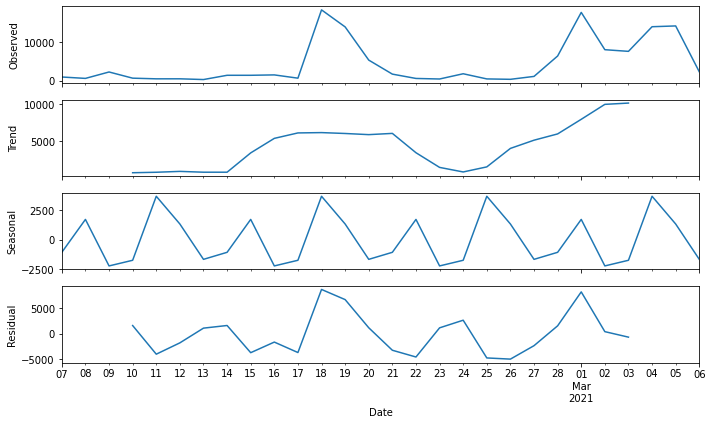

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df1["Daily Total Reach"], model = 'additive')
x = decomposed.plot()

There is some seasonality in 'Daily Total Reach' data.

We find the correlation of all the the numeric columns of the dataframe df1 using the corr() method.

In [ ]:
df1.corr()

,Daily New Likes,Daily Page Engaged Users,Daily Total Reach,Daily Viral Reach,Daily Total Impressions of your posts,Daily Total Consumers,Daily Page Consumptions
Daily New Likes,1.000000,0.564765,0.432809,0.453437,0.444464,0.550486,0.545137
Daily Page Engaged Users,0.564765,1.000000,0.741454,0.776317,0.762088,0.981460,0.978556
Daily Total Reach,0.432809,0.741454,1.000000,0.796023,0.996999,0.728618,0.697794
Daily Viral Reach,0.453437,0.776317,0.796023,1.000000,0.813414,0.771593,0.738929
Daily Total Impressions of your posts,0.444464,0.762088,0.996999,0.813414,1.000000,0.751484,0.722615
Daily Total Consumers,0.550486,0.981460,0.728618,0.771593,0.751484,1.000000,0.997862
Daily Page Consumptions,0.545137,0.978556,0.697794,0.738929,0.722615,0.997862,1.000000


We use the function regplot in the seaborn library to determine if the feature 'Daily Total Reach' is negatively or positively correlated with 'Daily New Likes'.

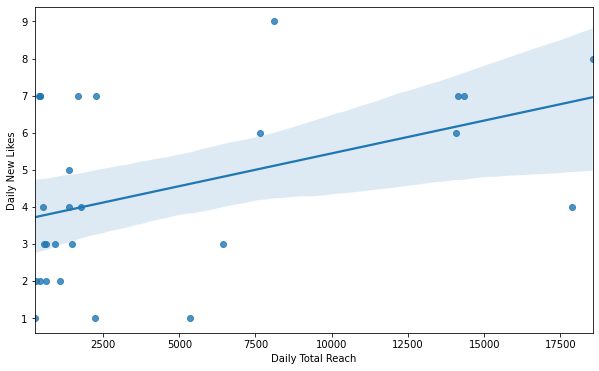

In [ ]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'Daily Total Reach', y = 'Daily New Likes', data = df1)
plt.show()

There is some positive correlation between 'Daily Total Reach' and 'Daily New Likes'.

We use the function regplot in the seaborn library to determine if the feature 'Daily Viral Reach' is negatively or positively correlated with 'Daily Page Consumptions'.

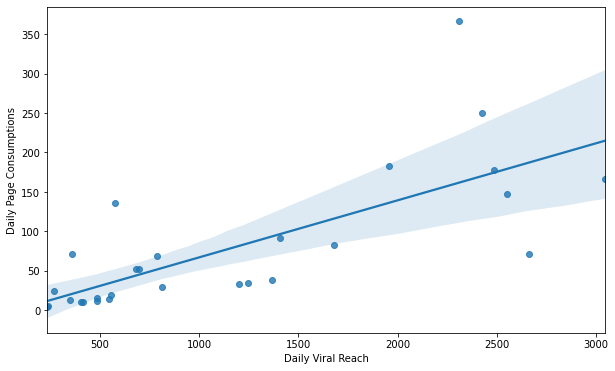

In [ ]:
plt.figure(figsize = (10,6))
sns.regplot(x = 'Daily Viral Reach', y = 'Daily Page Consumptions', data = df1)
plt.show()

There is some positive correlation between 'Daily Viral Reach' and 'Daily Page Consumptions'.